In [94]:
import numpy as np
import cvxpy as cp
import networkx as nx

from numpy.random import default_rng
from linalg_utils import *
from opt_utils import hyperplane_rounding, fixed_point_iteration, normalize_rows, load_graph

In [95]:
import os
folder = os.path.abspath(os.getcwd())

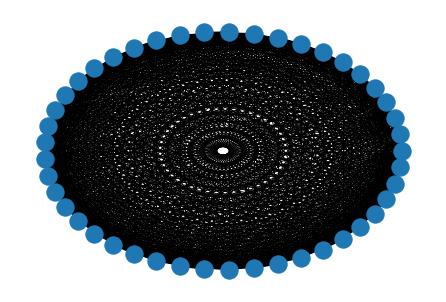

In [96]:
graph_file = "MANN-a9.mtx"
graph_type = 1

G = nx.complement(load_graph(graph_file, graph_type))
n = len(G)

# Max-cut

In [97]:
L = nx.laplacian_matrix(G).toarray() * 1.0

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [98]:
# x = cp.Variable(n)
# constraints = [ cp.square(x[i]) == 1 for i in range(n) ]
# prob = cp.Problem(cp.Minimize(cp.norm(x - x_0.T[0])), constraints)
# prob.solve()

In [99]:
X = cp.Variable((n,n), PSD=True)
constraints = [ X[i][i] == 1 for i in range(n) ]
prob = cp.Problem(cp.Maximize(1/4 * (cp.trace(L @ X))), constraints)
prob.solve()

61.1699026278161

In [100]:
np.linalg.eigvalsh(X.value)

array([-1.22093858e-10, -1.22093621e-10, -1.22093453e-10, -1.03653301e-10,
       -7.10643269e-11, -7.10635910e-11, -7.10632710e-11, -7.10632085e-11,
       -7.10629395e-11, -7.10627657e-11, -7.10625906e-11, -7.10616280e-11,
        4.14720769e-10,  4.14721089e-10,  4.14721247e-10,  4.14721297e-10,
        4.14721462e-10,  4.14721552e-10,  4.14721577e-10,  4.14721618e-10,
        4.14721731e-10,  4.14721797e-10,  4.14721898e-10,  4.14721998e-10,
        4.14722140e-10,  4.14722329e-10,  4.14722386e-10,  4.14722528e-10,
        4.94592072e-10,  5.57123889e-10,  5.57124037e-10,  5.57124127e-10,
        5.57124204e-10,  5.57124297e-10,  5.57124514e-10,  5.57124661e-10,
        5.57124917e-10,  5.62500000e+00,  5.62500000e+00,  5.62500000e+00,
        5.62500000e+00,  5.62500000e+00,  5.62500000e+00,  5.62500000e+00,
        5.62500000e+00])

In [101]:
# _, x_0 = hyperplane_rounding(decompose_psd(X.value), lambda Y : -1/4 * np.trace(Y @ Y.T @ L))

In [102]:
# if x_0[0] < 0:
#     x_0 = -x_0
#
# # find X in the elliptope whose first column should be the same as x_0, due to the objective function
# X_close = cp.Variable((n,n), PSD=True)
# constraints = [ X_close[i][i] == 1 for i in range(n) ]
# prob = cp.Problem(cp.Maximize(cp.sum([x_0[i] * X_close[i][0] for i in range(n)])), constraints)
# prob.solve(solver=cp.MOSEK)
#
# print(np.linalg.eigvalsh(X_close.value))
# print(1/4 * np.trace(X_close.value @ L))

In [103]:
X_val = X.value

In [104]:
eigen_val, eigen_vec = np.linalg.eigh(X_val)
# eigen_val[eigen_val > 1e-6] -= 0.01
eigen_val[36] += 0.00001
X_val = eigen_vec @ np.diag(eigen_val) @ eigen_vec.T
X_val *= 1 / X_val[0][0]

In [92]:
X.value = X_val

In [93]:
# 0 is not in the feasible region
fixed_point_iteration(prob, X, -np.eye(n), tol=1e-6)

initial objective: 61.169905
initial eigenvalues:
[-1.22094161e-10 -1.22093385e-10 -1.22092595e-10 -1.03652148e-10
 -7.10633934e-11 -7.10632210e-11 -7.10629809e-11 -7.10624770e-11
 -7.10622191e-11 -7.10616962e-11 -7.10607956e-11 -7.10605519e-11
  4.14720733e-10  4.14720927e-10  4.14721140e-10  4.14721254e-10
  4.14721490e-10  4.14721530e-10  4.14721740e-10  4.14721986e-10
  4.14722167e-10  4.14722288e-10  4.14722387e-10  4.14722443e-10
  4.14722561e-10  4.14722787e-10  4.14723093e-10  4.14723234e-10
  4.94587562e-10  5.57123920e-10  5.57124068e-10  5.57124360e-10
  5.57124455e-10  5.57124738e-10  5.57125025e-10  5.57125399e-10
  1.00005571e-05  5.62500000e+00  5.62500000e+00  5.62500000e+00
  5.62500000e+00  5.62500000e+00  5.62500000e+00  5.62500000e+00
  5.62500000e+00]
current objective: 61.169902
current objective: 61.169902
current objective: 61.169903
current objective: 61.169903
current objective: 61.169884
current objective: 61.149422
current objective: 60.642324
current object